a)
Load the dataset and display the last 3 lines, to make sure everything is working correctly.


In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
import math
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [193]:
data = pd.read_csv('satisfaction.csv')
df = pd.DataFrame(data)
df.tail(3)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
129876,16986,satisfied,Female,Loyal Customer,11,Business travel,Eco,610,5,1,...,5,5,5,4,1,2,5,5,82,65.0
129877,50316,satisfied,Male,Loyal Customer,46,Business travel,Business,86,1,1,...,5,5,1,3,1,5,2,2,0,0.0
129878,22333,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,...,5,5,4,4,2,5,5,5,0,0.0


b)
Find the mean flight distance for all passengers.

In [194]:
sum_flight_distance = df['Flight Distance'].sum()
lenght = df['Flight Distance'].shape[0]
mean = sum_flight_distance / lenght
print(round(mean,3))


1190.295


c)
Find the mean flight distance for women under the age of 30 years.

In [195]:
df_30_female_distance = df.loc[(df['Age'] <= 30) & (df['Gender'] == 'Female')]['Flight Distance']
mean_30_female_distance = df_30_female_distance.sum() / df_30_female_distance.shape[0]
print(mean_30_female_distance)

1009.3397714393653


d)
Create a line diagram for flights with a departure delay of ten minutes or more, where the departure
delay in minutes is on the x-axis, and number of occurrences is on the y-axis

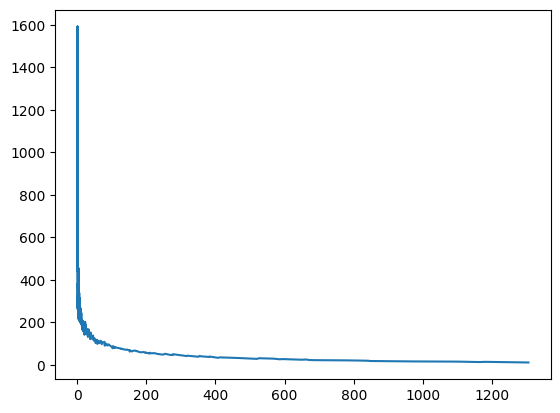

In [196]:
k = df[df['Departure Delay in Minutes'] > 10]
pivot = k['Departure Delay in Minutes'].value_counts()
pivot_index = pivot.index
pivot_values = pivot.values
plt.plot(pivot_values,pivot_index)
plt.show()

# solution with group by
# departure_delay_filter = (df['Departure Delay in Minutes'] >= 10)
# departure_filtered_df = df[departure_delay_filter]
# grouped_df = departure_filtered_df.groupby('Departure Delay in Minutes')
# counted = grouped_df.size()



Create a bar chart showing the distribution of the age of the passengers.
Hint: the function size() for "grouped dataframes" can be of help here.

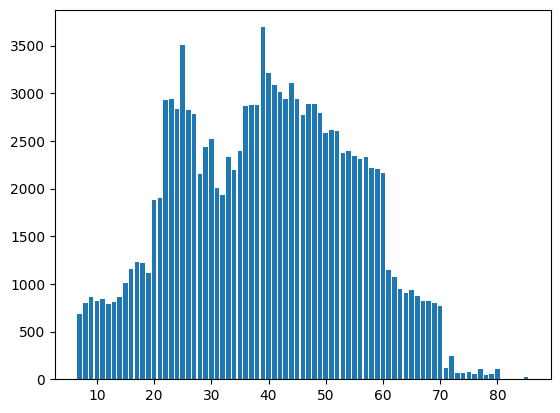

In [197]:
pivot_age = df.groupby('Age').size()
plt.bar(pivot_age.index,pivot_age.values)
plt.show()


f)
Assume that gender, customer type, age, type of travel, and flight distance are predictors. Create a
decision tree for what class (Business, Eco Plus, Eco) a passenger is likely travel on. How well does
the tree predict, and how will deepening the tree affect the prediction error? You may find that the
2
class «Eco Plus» seems to be missing unless the tree becomes very deep. Can you think of why this
is?


In [198]:
df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)
df['Customer Type'].replace('disloyal Customer', 0, inplace=True)
df['Customer Type'].replace('Loyal Customer', 1, inplace=True)
df['Type of Travel'].replace('Personal Travel',0,inplace=True)
df['Type of Travel'].replace('Business travel',1,inplace=True)
df['Class'].replace('Eco',0,inplace=True)
df['Class'].replace('Eco Plus',1,inplace=True)
df['Class'].replace('Business',2,inplace=True)

features = ['Gender','Customer Type','Age','Type of Travel','Flight Distance']
X = df[features]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
classifier = DecisionTreeClassifier(min_impurity_decrease=0.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     11721
           1       0.00      0.00      0.00      1899
           2       0.76      0.83      0.79     12356

    accuracy                           0.75     25976
   macro avg       0.50      0.54      0.52     25976
weighted avg       0.69      0.75      0.72     25976

Accuracy: 0.749461040960887


C:\Users\tryam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tryam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tryam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

In [199]:
dotfile = open("./dtree1.dot", "w")
tree.export_graphviz(classifier, out_file=dotfile, feature_names=features,class_names=['Gender','Customer Type','Age','Type of Travel','Flight Distance'])
dotfile.close()

g)
Are passengers traveling business class more or less likely to be satisfied than passengers traveling on
Eco or Eco Plus? Create a regression tree which shows this.

In [200]:

# df['satisfaction_v2'].unique()
# df['satisfaction_v2'].replace('satisfied',1,inplace=True)
# df['satisfaction_v2'].replace('neutral',0,inplace=True)
# df['satisfaction_v2'].replace('dissatisfied',0,inplace=True)
# df['Class'].replace('Eco',0,inplace=True)
# df['Class'].replace('Eco Plus',0,inplace=True)
# df['Class'].replace('Business',1,inplace=True)
# X =df['Class']
# y = df['satisfaction_v2']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# regr = DecisionTreeRegressor(min_impurity_decrease=0.01)
# regr.fit(X_train, y_train)
# # Test tree
# y_pred = regr.predict(X_test)
# print("Training score: " + format(regr.score(X_train,y_train)))
# print("Testing score: " + format(regr.score(X_test,y_test)))
# # Display tree
# dotfile = open("./dtree3.dot", 'w')
# ditfile = tree.exp


In [201]:
# df = df[['satisfaction_v2', 'Class']]
# y = df['satisfaction_v2']
# X = df.drop('satisfaction_v2', axis=1)
# # We split the dataset horizontally. We use 20% for testing and 80% for training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# # Grow tree, using max_depth and/or min_impurity_decrease (mse, Mean Squared Error)
# regr = DecisionTreeRegressor(min_impurity_decrease=0.01)
# regr.fit(X_train, y_train)
# # Test tree
# y_pred = regr.predict(X_test)
# print("Training score: " + format(regr.score(X_train,y_train)))
# print("Testing score: " + format(regr.score(X_test,y_test)))
# # Display tree
# dotfile = open("./dtree3.dot", 'w')
# ditfile = tree.export_graphviz(regr, out_file = dotfile, feature_names = X.columns)
# dotfile.close()

We assume people of the same gender and age have similar priorities when flying. If a male has been
categorized as a loyal customer and have stated being satisfied with his flight, and having given the
grade 4 for seat comfort, 5 when grading food or drink, 5 for gate location, 5 for wifi service, 5 for
inflight entertainment, and 3 for ease of online booking. Using KNN and assuming a K of 6, how old
is he likely to be?

In [202]:
df.head(3)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,1,0,56,0,0,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,1,0,49,0,0,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,1,0,55,0,0,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0


In [209]:
df['satisfaction_v2'].replace('satisfied',1,inplace=True)
df['satisfaction_v2'].replace('neutral',0,inplace=True)
df['satisfaction_v2'].replace('dissatisfied',0,inplace=True)
df['satisfaction_v2'].replace('neutral or dissatisfied',0,inplace=True)

# gender, customer Type, seat, food, gate location, wifi, entertainment, online booking - > age
features =['Gender','Customer Type','satisfaction_v2','Seat comfort','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Ease of Online booking']
X = df[features]
y = df['Age']
k = 6
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
# knn.fit(X_train, y_train)
# predicted_values = knn.predict(X_test)
# cm = metrics.confusion_matrix(y_test, predicted_values)
# tp,fp,fn,tn = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
# accuracy = (tp + tn) / (tp+fp+fn+tn)

In [210]:
X['satisfaction_v2'].unique()

array([1, 0], dtype=int64)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)
print(X_test)
predicted_values = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, predicted_values)
tp,fp,fn,tn = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
accuracy = (tp + tn) / (tp+fp+fn+tn)


        Gender  Customer Type  satisfaction_v2  Seat comfort  Food and drink  \
7722         1              1                0             5               5   
4873         0              1                0             4               4   
11677        1              1                0             5               5   
28579        0              1                0             4               4   
95056        0              1                1             5               3   
...        ...            ...              ...           ...             ...   
62599        1              0                1             5               2   
46574        0              0                0             4               2   
16754        1              1                0             2               2   
95242        1              1                1             4               4   
109939       0              1                1             5               3   

        Gate location  Inflight wifi se

In [224]:
print(knn.predict(np.array([1,1,1,4,5,5,5,5,3]).reshape(1,-1)))

[32]


C:\Users\tryam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

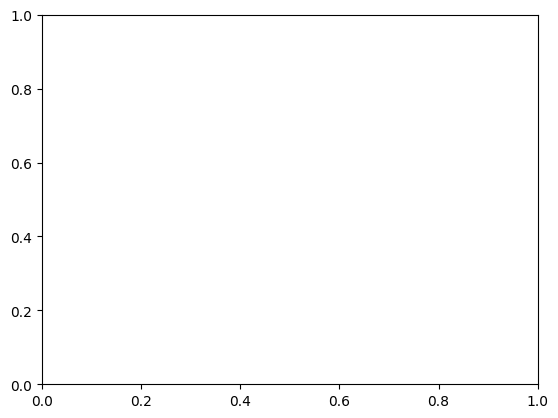

In [226]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=predicted_values, s=50, cmap=cmap)
f.colorbar(points)
plt.show()